In [ ]:
#whether first babies arrive late
#Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others…)

In [4]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [2]:
#load the data from the pregnancy file and select the records for live births.
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]   

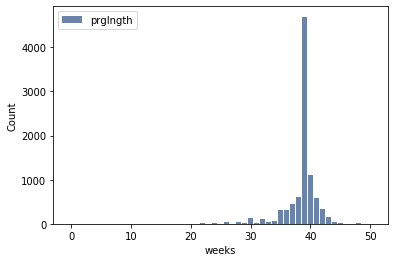

In [5]:
#plot the histogram of pregnancy lengths (column prglngth).
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

In [17]:
#Display all pregnancy lengths and their frequency
#As evident from the histogram above the values are concentrated between 35 and 42 weeks
for weeks, freq in hist.Largest(100):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116
39 4693
38 607
37 455
36 321
35 311
34 60
33 49
32 115
31 27
30 138
29 21
28 32
27 3
26 35
25 3
24 13
23 1
22 7
21 2
20 1
19 1
18 1
17 2
13 1
9 1
4 1
0 1


In [18]:
#From live births, we can select first babies and others using `birthord`, 
#then compute histograms of pregnancy length for the two groups.
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

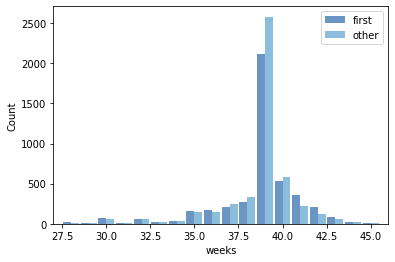

In [19]:
#We can use width and align to plot two histograms side-by-side.
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [ ]:
#From the histogram both the distributions forms a similar pattern and we 
#cannot make this statement that the first baboes arrives late. Rather it could be a fair argument that the first babies
#gets delivered following a similar pattern compared to other deliveries
#In this example, there are fewer 'first babies' than 'others', so some
#of the apparent differences in the histograms are due to sample sizes.

In [20]:
#Now lets us look at the summary statitics for pregnency lengths of the live births
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
print ("Live births statitics mean: %f, var: %f, std %f",(mean,var,std))

Population statitics mean: %f, var: %f, std %f (38.56055968517709, 7.302662067826851, 2.702343810070593)


In [21]:
#summary statitics for first babies
mean = firsts.prglngth.mean()
var = firsts.prglngth.var()
std = firsts.prglngth.std()
print ("first babies statitics mean: %f, var: %f, std %f",(mean,var,std))

first babies statitics mean: %f, var: %f, std %f (38.60095173351461, 7.794713509229059, 2.7919014146686947)


In [22]:
#summary statitics for other babies
mean = others.prglngth.mean()
var = others.prglngth.var()
std = others.prglngth.std()
print ("others babies statitics mean: %f, var: %f, std %f",(mean,var,std))

others babies statitics mean: %f, var: %f, std %f (38.52291446673706, 6.842683519298573, 2.615852350439255)


In [25]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

In [23]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [24]:
#Compute the Cohen effect size for the difference in pregnancy length for first babies and others.
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

In [ ]:
#Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium' 
#effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2
#standard deviations or more, the difference is trivial, even if it is statistically signficant.
#Ref: https://people.bath.ac.uk/pssiw/stats2/page2/page14/page14.html
#Mean pregnancy length for first babies is 38.601; for other babies it is 38.523.
#The difference is 0.078 weeks, which works out to 13 hours. As a fraction of
#the typical pregnancy length i.e 42 weeks, this difference is about 0.2%.
#The cohen's effect size is 0.029
#If we assume this estimate is accurate, such a difference would have no practical consequences.

In [26]:
#Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others…)

In [30]:
#Now lets us look at the summary statitics for the totalwgt_lb of live births
mean = live.totalwgt_lb.mean()
var = live.totalwgt_lb.var()
std = live.totalwgt_lb.std()
print ("Live births totalwgt_lb statitics mean: %f, var: %f, std %f",(mean,var,std))

Live births totalwgt_lb statitics mean: %f, var: %f, std %f (7.265628457623368, 1.9832904288326532, 1.4082934455690168)


In [31]:
#summary statitics for totalwgt_lb of first babies
mean = firsts.totalwgt_lb.mean()
var = firsts.totalwgt_lb.var()
std = firsts.totalwgt_lb.std()
print ("first babies totalwgt_lb statitics mean: %f, var: %f, std %f",(mean,var,std))

first babies totalwgt_lb statitics mean: %f, var: %f, std %f (7.201094430437772, 2.0180273009157768, 1.4205728777207374)


In [32]:
#summary statitics for totalwgt_lb of other babies
mean = others.totalwgt_lb.mean()
var = others.totalwgt_lb.var()
std = others.totalwgt_lb.std()
print ("others totalwgt_lb statitics mean: %f, var: %f, std %f",(mean,var,std))

others totalwgt_lb statitics mean: %f, var: %f, std %f (7.325855614973262, 1.9437810258964572, 1.3941954762143138)


In [33]:
#Compute the Cohen effect size for the difference in total weight in lbs for first babies and others.
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

In [35]:
firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()

-0.12476118453549034

In [37]:
(abs(firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean())/live.totalwgt_lb.mean())*100

1.7171423678372415

In [ ]:
#Cohen suggested that d=0.2 be considered a 'small' effect size, 0.5 represents a 'medium' 
#effect size and 0.8 a 'large' effect size. This means that if two groups' means don't differ by 0.2
#standard deviations or more, the difference is trivial, even if it is statistically signficant.
#Ref: https://people.bath.ac.uk/pssiw/stats2/page2/page14/page14.html
#Mean  total weight in lbs for first babies is 7.201; for other babies it is 7.326.
#The difference is 0.125 lbs,. As a fraction of
#the total weight in lbs for combined population this difference is about .125/7.266 = 1.72%
#The cohen's effect size is 0.089
#If we assume this estimate is accurate, such a difference would have no practical consequences.